#  CANCER vs HEART DISEASE

In this analysis I compared the density between Cancer and Heart Disease throughout the United States amongst Caucasians, African Americans, and Hispasnics. Everyone under the age of twenty-five had to be excluded due to the lack of data in Heart Disease for that group. I chose a density plot due to the large percentage of Caucasians versus the other two.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cause_path = glob('LEADINGCAUSESOFDEATH.csv')
cause_df = pd.read_csv(cause_path[0]) 

In the cell below  I completed the following steps:
    1. Removed unwanted columns
    2. Renamed the columns so they were easier to read
    3. Removed strange values such as -1111 and reaplced them with Nan
    4. Concatenated the columns by grouping all the counties to their state and running  the mean on all other columns
    5. I rounded all the indexes
    

In [241]:
 columns_to_remove =  [column for column in cause_df if ('CI_' not in column) & ('Ot_' not in column) &
                        ('_FIPS_' not in column) & ('Strata_ID_Number' not in column) &
                         ('CHSI_State_Abbr' not in column) & ('Min_' not in column) & ('Max_' not in column) & 
                          ('Comp' not in column) & ('BirthDef' not in column)& ('Injury' not in column) & 
                          ('Homicide' not in column) & ('Suicide' not in column) &  ('Time_Span' not in column) & 
                           ('HIV' not in column)]
cause_df = cause_df[columns_to_remove]


cause_columns_abbreviations = [column.replace('A_', 'Under 1').replace('B_', '1-14').replace('C_', '15-24') 
                               .replace('D_', '25-44').replace('E_', '45-64').replace('F_', '65+').replace
                               ('Wh_', 'White').replace('Bl_', 'Black').replace('Hi_', 'Hispanic')for column in cause_df.columns]
cause_df.columns = cause_columns_abbreviations

numeric_error = cause_df.select_dtypes(include=[pd.np.number]).columns
for c in numeric_error:
    cause_df.loc[cause_df[c] < 0, c] = float('nan')
    
cause_pop_df = cause_df.loc[:,['CHSI_State_Name',]]
cause_remain_df = cause_df.drop(['CHSI_County_Name',],axis = 1) 

cause_state_df= pd.concat([cause_pop_df.groupby('CHSI_State_Name').sum(),cause_remain_df.groupby('CHSI_State_Name').mean()], axis = 1)
master_cause_df = cause_state_df.round()



In the cells below you will find six tables seperated into three different age groups.25-44, 45-64, and 65+. Each group includes subjects from each race. The x-axis represents the mean from each state and the y axis represents the density of each group.

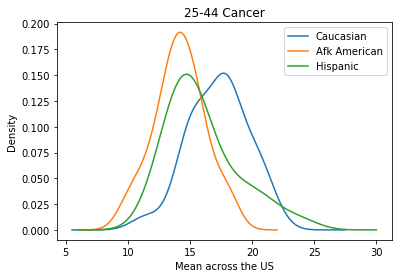

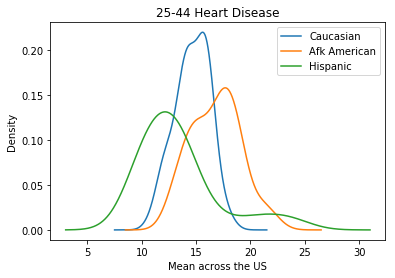

In [248]:
plt.subplot(111)
plt.title('25-44 Cancer')
master_cause_df['25-44WhiteCancer'].plot.kde(label='Caucasian')
master_cause_df['25-44BlackCancer'].plot.kde(label='Afk American')
master_cause_df['25-44HispanicCancer'].plot.kde(label='Hispanic')
plt.xlabel('Mean across the US')
plt.legend()
plt.show()

plt.subplot(111)
plt.title('25-44 Heart Disease')
master_cause_df['25-44WhiteHeartDis'].plot.kde(label='Caucasian')
master_cause_df['25-44BlackHeartDis'].plot.kde(label='Afk American')
master_cause_df['25-44HispanicHeartDis'].plot.kde(label='Hispanic')
plt.xlabel('Mean across the US')
plt.legend()
plt.show()


In this age group we can see that African Americans have the highest Cancer density while Caucasians have the highest density in Head Disease. Although African Americans don't have the highest densisty in Heart disease they do have the highest density average. Hispanics have the lowest density as the means seem to spread across the entire x-axis.

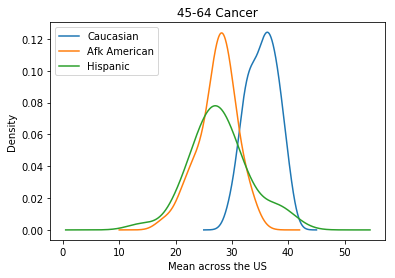

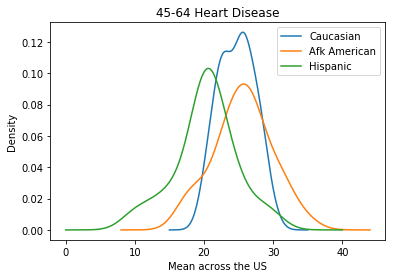

In [246]:
plt.subplot(111)
plt.title('45-64 Cancer')
master_cause_df['45-64WhiteCancer'].plot.kde(label='Caucasian')
master_cause_df['45-64BlackCancer'].plot.kde(label='Afk American')
master_cause_df['45-64HispanicCancer'].plot.kde(label='Hispanic')
plt.xlabel('Mean across the US')
plt.legend()
plt.show()

plt.subplot(111)
plt.title('45-64 Heart Disease')
master_cause_df['45-64WhiteHeartDis'].plot.kde(label='Caucasian')
master_cause_df['45-64BlackHeartDis'].plot.kde(label='Afk American')
master_cause_df['45-64HispanicHeartDis'].plot.kde(label='Hispanic')
plt.xlabel('Mean across the US')
plt.legend()
plt.show()

On the first plot Caucasians and African Americans have a high density rate although Caucasians have a higher average. In the second plot the Hispanic graph falls in between Caucasians and African Americans for the first time.

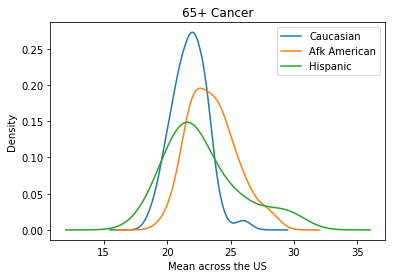

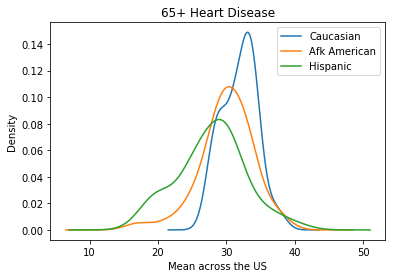

In [247]:
plt.subplot(111)
plt.title('65+ Cancer')
master_cause_df['65+WhiteCancer'].plot.kde(label='Caucasian')
master_cause_df['65+BlackCancer'].plot.kde(label='Afk American')
master_cause_df['65+HispanicCancer'].plot.kde(label='Hispanic')
plt.xlabel('Mean across the US')
plt.legend()
plt.show()

plt.subplot(111)
plt.title('65+ Heart Disease')
master_cause_df['65+WhiteHeartDis'].plot.kde(label='Caucasian')
master_cause_df['65+BlackHeartDis'].plot.kde(label='Afk American')                                         
master_cause_df['65+HispanicHeartDis'].plot.kde(label='Hispanic')
plt.xlabel('Mean across the US')
plt.legend()
plt.show()


In both plots we can see that Caucasians clearly surpass the others while hispanics continue to have the lowest density. 


### CONCLUSION
Caucasians have the highest density in all categories besides the 25-44 cancer plot. African Americans and Hispanics have a much lower density in almost all categories making it more diffciult to pinpoint what the trigger could be for each cause. Hispanics have the highest life expectancy per race in the US which could be why they have the lowest density overall, since the majority are most likely to die of old age. A reason why the Caucasian density could be the highest, is because they have the lowest uninsured rate and better access to health care versus the others. 
